In [4]:
import numpy as np
import pandas as pd
import sys
import os
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Input, Dropout, \
    Add, Bidirectional, Embedding, LSTM, CuDNNLSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.datasets import cifar10, imdb, reuters, fashion_mnist, boston_housing

In [5]:
def get_model():
    model = Sequential()
    #model.add(Bidirectional(LSTM(hidden_dim, return_sequences=True)))
    #model.add(Bidirectional(LSTM(hidden_dim)))
    model.add(LSTM(hidden_dim, return_sequences=True))
    model.add(LSTM(hidden_dim))
    #model.add(CuDNNLSTM(hidden_dim)) # speedup on GPU
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='mse', optimizer='adam')
    loss_history = model.fit(x_train, y_train, batch_size=128, verbose=2, epochs=epochs)

In [6]:
import tigercontrol

/Users/johnhallman/mlcourse/mlenv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [9]:
problem = tigercontrol.problem("Unemployment-v0")
problem.initialize()

3.4

In [11]:
series = problem.df['UNRATE']

In [27]:
list_data = series.tolist()
k = 100
#data = np.array([list_data[i:i+k] for i in range(len(list_data) - k)])
data = np.array([list_data[i+1]-list_data[i] for i in range(len(list_data)-1)])

In [28]:
data

0.00035005834305717494

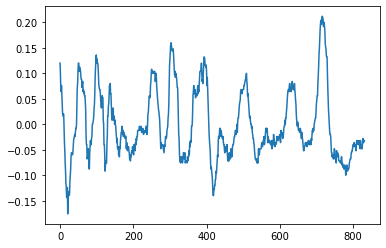

In [36]:
k=25
plt.plot([np.mean(data[i:i+k]) for i in range(len(data)-k)])

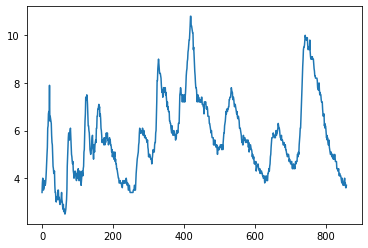

In [30]:
plt.plot(list_data)